### **Aluna**: Lais de Souza Ziegler
# 🛳️ Predição de sobrevivência em Naufrágio
Dataset: treino.csv

O projeto de predição de sobrevivência em naufrágios utiliza um conjunto de dados inspirado em um incidente recente no Mediterrâneo, contendo informações sobre 7.124 passageiros a bordo de um navio. As variáveis incluem identificação única do passageiro, nome, informações da cabine (deck, número e posição), procedência, destino, idade, status de VIP, modalidade de hospedagem e gastos com serviços a bordo. O objetivo é prever a probabilidade de um passageiro sobreviver ao naufrágio com base em suas características.

### 1️⃣ Leitura e exploração dos dados
---
#### Importando as bibliotecas necessárias para a análise de dados

In [1]:
# Pacotes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes do Scikit-learn para acesso a datasets, preparação, modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pacotes para modelos de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pacote de balanceamento de classes desbalanceadas
# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

#### Carregando o conjunto de dados a partir de um arquivo CSV 
- Em seguida, imprimindo os tipos de dados de cada coluna para entender a estrutura do DataFrame
- Exibindo as primeiras cinco linhas do conjunto de dados para uma visão geral dos dados

In [2]:
df = pd.read_csv("treino.csv")
print(df.dtypes)
df.head()

IDpassageiro     object
Nome             object
Deck             object
NumeroCabine      int64
PosicaoCabine    object
Procedencia      object
Destino          object
Idade             int64
VIP                bool
AllInclusive       bool
ServicoCabine     int64
Restaurante       int64
Shopping          int64
SPA               int64
ParquedeAguas     int64
Sobrevivente       bool
dtype: object


,IDpassageiro,Nome,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,5647_02,Chabih Matoltuble,D,193,P,Finland,Peru,61,False,True,239,1288,3380,1158,587,True
1,0107_01,Coobix Hart,A,1202,S,Argentina,Argentina,31,True,False,466,6,11299,1598,506,True
2,4158_01,Doryn Noeley,G,107,P,Peru,China,49,True,True,1240,674,10989,806,463,True
3,1316_01,Sadrus Quelfly,G,545,S,Indonesia,Greenland,32,False,True,176,1186,8750,1438,379,True
4,9069_05,Mirfark Taketiatim,D,392,P,Indonesia,Brazil,5,False,False,90,1318,161,2853,203,True


#### Imprimindo a forma do DataFrame, que retorna o número de linhas e colunas e verificando se existem valores ausentes, nulos

In [3]:
print("Shape: ",df.shape)
df.isnull().any()

Shape:  (1000, 16)


IDpassageiro     False
Nome             False
Deck             False
NumeroCabine     False
PosicaoCabine    False
Procedencia      False
Destino          False
Idade            False
VIP              False
AllInclusive     False
ServicoCabine    False
Restaurante      False
Shopping         False
SPA              False
ParquedeAguas    False
Sobrevivente     False
dtype: bool

#### Rápida análise exploratória dos dados usando o método describe() para gerar estatísticas descritivas. 
- Ele fornece um resumo das principais características dos dados, ajudando a entender a distribuição e características gerais das variáveis numéricas

In [4]:
df.describe()

,NumeroCabine,Idade,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,688.466000,39.816000,883.92700,690.624000,7410.141000,1518.977000,356.879000
std,404.869011,23.346203,498.44474,419.069741,4413.046425,861.974722,202.812532
min,1.000000,0.000000,4.00000,3.000000,2.000000,0.000000,0.000000
25%,332.750000,19.000000,473.50000,312.750000,3666.750000,797.750000,184.000000
50%,675.000000,40.000000,878.00000,680.000000,7309.000000,1472.500000,365.500000
75%,1049.500000,61.000000,1297.50000,1045.500000,11279.750000,2297.500000,532.000000
max,1365.000000,79.000000,1741.00000,1425.000000,15234.000000,2955.000000,705.000000


### 2️⃣ Pré-processamento de dados
---
#### Removendo a coluna 'IDPassageiro' e 'Nome'do DataFrame, pois elas não são relevantes para a análise ou modelagem  
- Utilizando o parâmetro 'axis=1' para indicar que a remoção é feita em colunas.

In [5]:
df = df.drop(['IDpassageiro', 'Nome'], axis = 1)

#### Transformando variáveis categóricas em quantitativas
- Criando colunas binárias para cada categoria
- Em seguida, convertendo todas as colunas do DataFrame para o tipo inteiro com 'astype(int)'

Esta técnica é conhecida como "One-hot Encoding". Ela é utilizada para transformar variáveis categóricas (que não possuem uma ordem numérica natural) em uma representação numérica que pode ser entendida por algoritmos de aprendizado de máquina. Isso é feito criando colunas binárias (0 ou 1) para cada possível valor da categoria.


In [6]:
# Codificação de Deck usando Label Encoding
df['Deck'] = df['Deck'].astype('category').cat.codes

# Codificação de PosicaoCabine (P = 1, S = 0)
df['PosicaoCabine'] = df['PosicaoCabine'].map({'P': 1, 'S': 0})
df.head(10)

,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,3,193,1,Finland,Peru,61,False,True,239,1288,3380,1158,587,True
1,0,1202,0,Argentina,Argentina,31,True,False,466,6,11299,1598,506,True
2,6,107,1,Peru,China,49,True,True,1240,674,10989,806,463,True
3,6,545,0,Indonesia,Greenland,32,False,True,176,1186,8750,1438,379,True
4,3,392,1,Indonesia,Brazil,5,False,False,90,1318,161,2853,203,True
5,1,852,1,China,Russia,72,False,True,1548,979,5356,1648,480,True
6,2,1150,0,Brazil,Indonesia,69,True,True,603,792,13718,2869,364,False
7,7,358,0,China,Portugal,5,True,False,84,873,3754,1110,357,True
8,4,710,0,China,Brazil,47,True,True,420,634,8517,423,487,True
9,2,877,0,Indonesia,United States,6,False,False,1360,16,13964,525,282,False


In [7]:
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular Q1 e Q3 e o IQR apenas nas colunas numéricas
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar o DataFrame original, removendo os outliers
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]


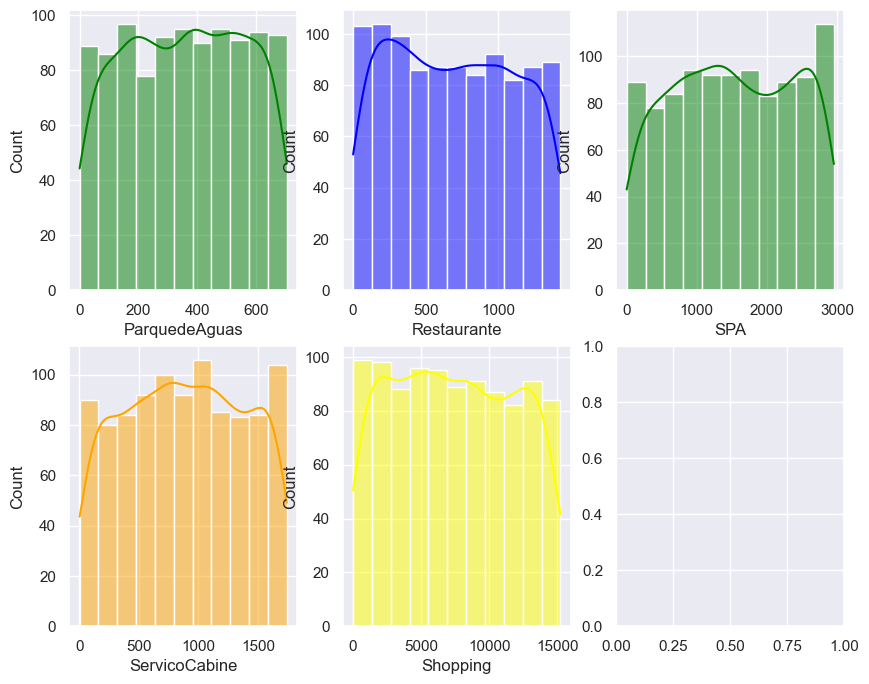

In [8]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.histplot(data=df, x="ParquedeAguas", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Restaurante", kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=df, x="ServicoCabine", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Shopping", kde=True, ax=axs[1, 1], color='yellow');
sns.histplot(data=df, x="SPA", kde=True, ax=axs[0, 2], color='green');

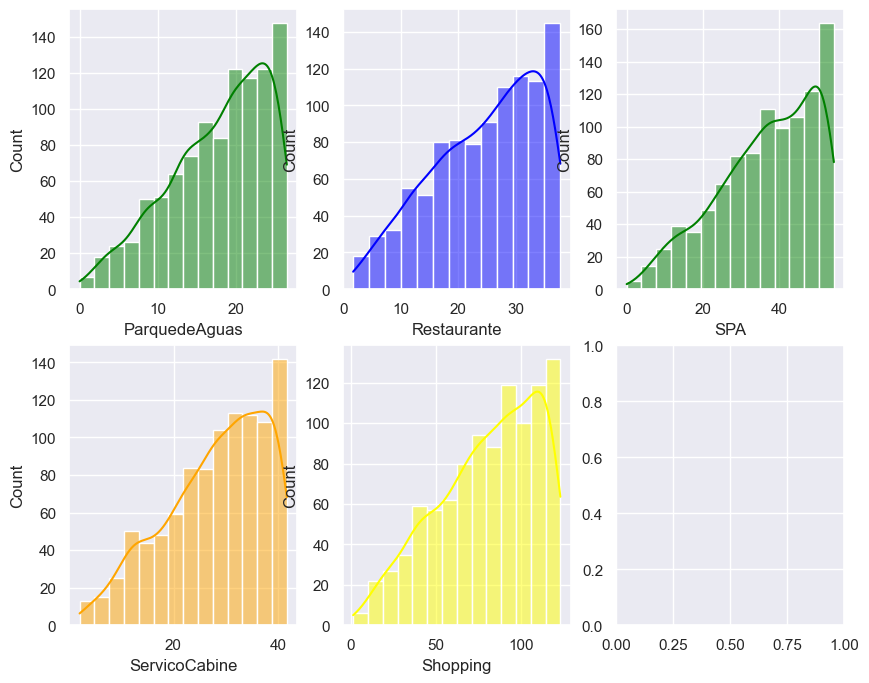

In [9]:
df.ParquedeAguas = np.sqrt(df.ParquedeAguas)
df.Restaurante = np.sqrt(df.Restaurante)
df.ServicoCabine = np.sqrt(df.ServicoCabine)
df.Shopping = np.sqrt(df.Shopping)
df.SPA = np.sqrt(df.SPA)

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.histplot(data=df, x="ParquedeAguas", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Restaurante", kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=df, x="ServicoCabine", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Shopping", kde=True, ax=axs[1, 1], color='yellow');
sns.histplot(data=df, x="SPA", kde=True, ax=axs[0, 2], color='green');

<Axes: xlabel='Idade', ylabel='Count'>

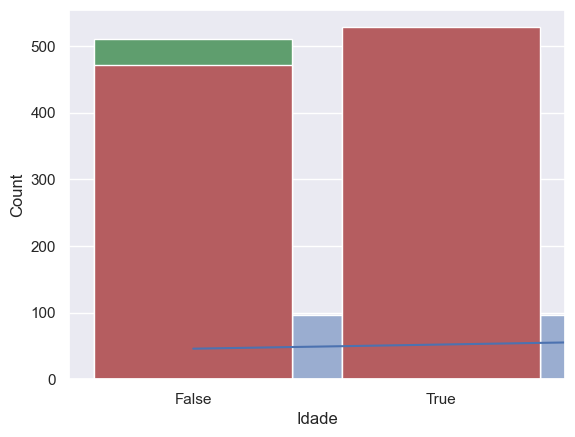

In [10]:
sns.histplot(df['Idade'], kde=True)
sns.countplot(data=df, x='VIP')
sns.countplot(data=df, x='AllInclusive')
sns.countplot(data=df, x='Sobrevivente')

In [11]:
print(df)

     Deck  NumeroCabine  PosicaoCabine             Procedencia        Destino  \
0       3           193              1                 Finland           Peru   
1       0          1202              0               Argentina      Argentina   
2       6           107              1                    Peru          China   
3       6           545              0               Indonesia      Greenland   
4       3           392              1               Indonesia         Brazil   
..    ...           ...            ...                     ...            ...   
995     6          1310              0  Bosnia and Herzegovina         Brazil   
996     6          1165              1           United States    Philippines   
997     4           520              1                  Brazil        Ukraine   
998     2           167              1                  Poland  United States   
999     6           961              1                   China       Portugal   

     Idade    VIP  AllInclu

In [12]:
cols = ["Sobrevivente", "Idade", "NumeroCabine", "Deck", "PosicaoCabine", "VIP", "AllInclusive"]
train_corr = df[cols].corr()
train_corr

,Sobrevivente,Idade,NumeroCabine,Deck,PosicaoCabine,VIP,AllInclusive
Sobrevivente,1.000000,0.028084,0.011796,-0.007704,-0.015130,0.026603,-0.038949
Idade,0.028084,1.000000,0.004141,-0.030655,0.027304,0.089407,-0.032905
NumeroCabine,0.011796,0.004141,1.000000,0.015362,-0.023164,0.034778,-0.019533
Deck,-0.007704,-0.030655,0.015362,1.000000,-0.007834,0.074313,0.043093
PosicaoCabine,-0.015130,0.027304,-0.023164,-0.007834,1.000000,-0.030165,-0.016325
VIP,0.026603,0.089407,0.034778,0.074313,-0.030165,1.000000,-0.010203
AllInclusive,-0.038949,-0.032905,-0.019533,0.043093,-0.016325,-0.010203,1.000000


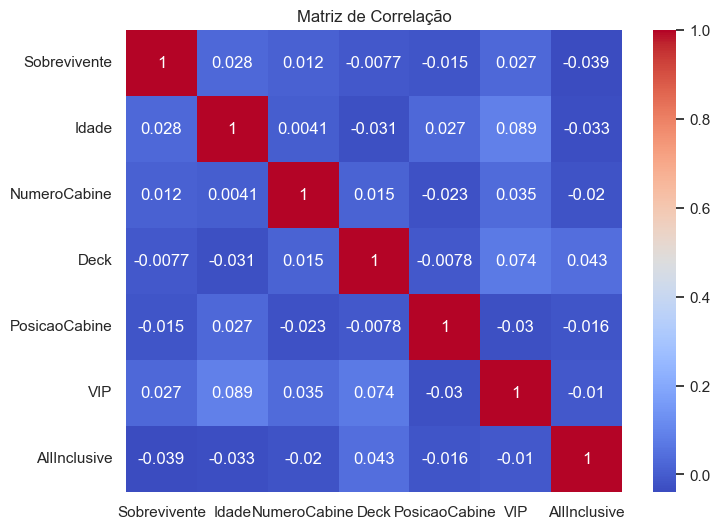

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

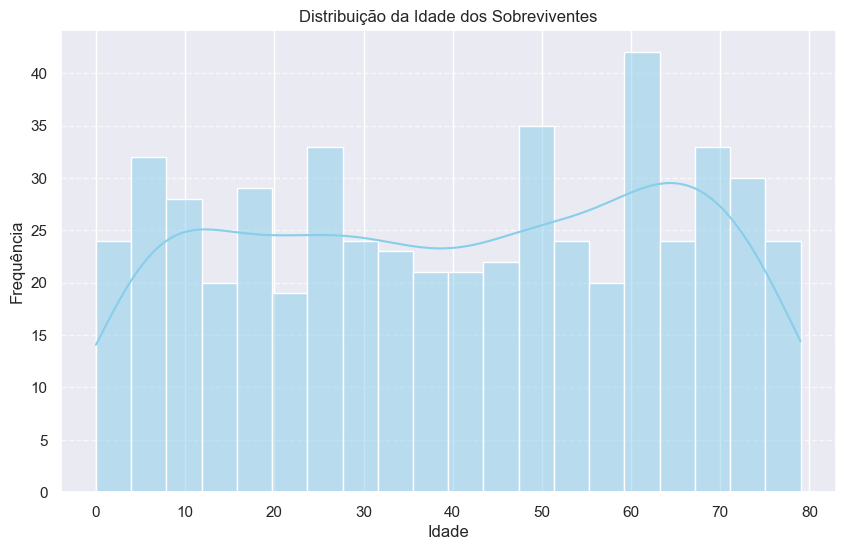

In [14]:
sobreviventes = df[df['Sobrevivente'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(sobreviventes['Idade'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade dos Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Definir as faixas de idade
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Faixas de idade
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Rótulos para as faixas

# Categorizar as idades dos sobreviventes nas faixas
sobreviventes['Faixa de Idade'] = pd.cut(sobreviventes['Idade'], bins=bins, labels=labels, right=False)

# Contar o número de sobreviventes em cada faixa
tabela_sobreviventes = sobreviventes['Faixa de Idade'].value_counts().sort_index()

# Criar um DataFrame para exibir a tabela
tabela_sobreviventes = tabela_sobreviventes.reset_index()
tabela_sobreviventes.columns = ['Faixa de Idade', 'Número de Sobreviventes']

# Exibir a tabela
print(tabela_sobreviventes)

  Faixa de Idade  Número de Sobreviventes
0           0-10                       70
1          11-20                       63
2          21-30                       58
3          31-40                       62
4          41-50                       61
5          51-60                       61
6          61-70                       86
7          71-80                       67


C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_53532\2594702712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobreviventes['Faixa de Idade'] = pd.cut(sobreviventes['Idade'], bins=bins, labels=labels, right=False)


C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_53532\1457282198.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VIP', ax=axes[0, 1], palette='pastel')
C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_53532\1457282198.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AllInclusive', ax=axes[1, 0], palette='pastel')
C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_53532\1457282198.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sobrevivente', ax=axes[1, 1], palette='pastel')


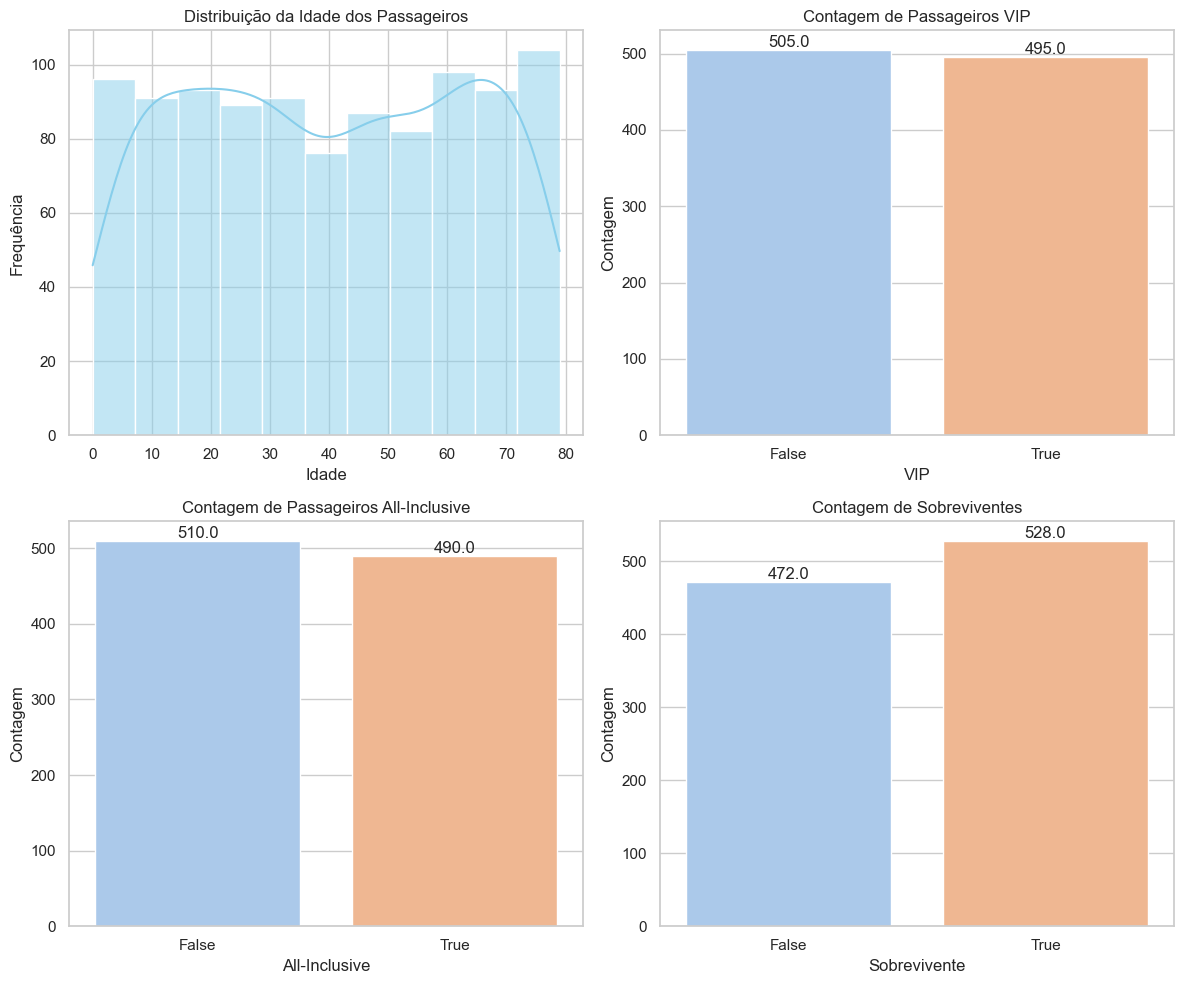

In [16]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com múltiplos subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Histograma da Idade com KDE
sns.histplot(df['Idade'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribuição da Idade dos Passageiros')
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Frequência')

# Gráfico 2: Contagem de VIP
vip_counts = df['VIP'].value_counts()
sns.countplot(data=df, x='VIP', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Contagem de Passageiros VIP')
axes[0, 1].set_xlabel('VIP')
axes[0, 1].set_ylabel('Contagem')

# Adicionar valores dentro do gráfico de VIP
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

# Gráfico 3: Contagem de AllInclusive
all_inclusive_counts = df['AllInclusive'].value_counts()
sns.countplot(data=df, x='AllInclusive', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Contagem de Passageiros All-Inclusive')
axes[1, 0].set_xlabel('All-Inclusive')
axes[1, 0].set_ylabel('Contagem')

# Adicionar valores dentro do gráfico de All-Inclusive
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

# Gráfico 4: Contagem de Sobreviventes
sns.countplot(data=df, x='Sobrevivente', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Contagem de Sobreviventes')
axes[1, 1].set_xlabel('Sobrevivente')
axes[1, 1].set_ylabel('Contagem')

# Adicionar valores dentro do gráfico de Sobreviventes
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

# Ajustar o layout
plt.tight_layout()
plt.show()

In [17]:
le = LabelEncoder()
df['Procedencia'] = le.fit_transform(df['Procedencia'])
df['Destino'] = le.fit_transform(df['Destino'])
df

,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,3,193,1,35,93,61,False,True,15.459625,35.888717,58.137767,34.029399,24.228083,True
1,0,1202,0,4,4,31,True,False,21.587033,2.449490,106.296754,39.974992,22.494444,True
2,6,107,1,87,22,49,True,True,35.213634,25.961510,104.828431,28.390139,21.517435,True
3,6,545,0,46,43,32,False,True,13.266499,34.438351,93.541435,37.920970,19.467922,True
4,3,392,1,46,13,5,False,False,9.486833,36.304270,12.688578,53.413481,14.247807,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,1310,0,13,13,61,True,True,39.610605,10.295630,89.944427,53.990740,26.076810,True
996,6,1165,1,116,94,48,False,True,38.144462,8.366600,89.448309,53.460266,19.000000,True
997,4,520,1,15,122,41,False,False,21.702534,29.000000,109.041277,10.000000,20.904545,True
998,2,167,1,89,124,75,False,True,32.741411,33.660065,118.122817,36.810325,19.595918,False


In [18]:
# Dividir os dados em conjuntos de treinamento e teste
X = df.drop('Sobrevivente', axis=1)
y = df['Sobrevivente']
# X, y = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

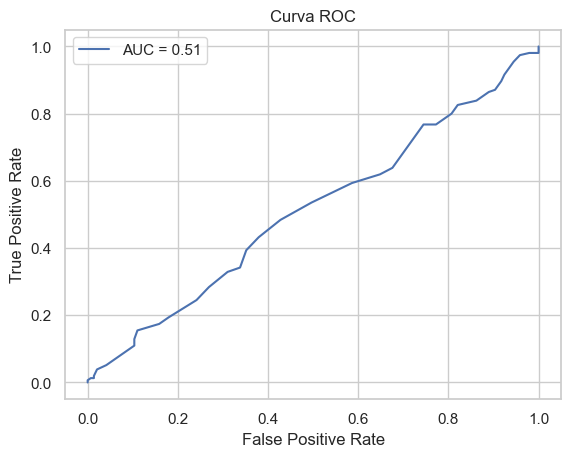

In [22]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [23]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 49.00%
Recall: 61.94%
F1 Score: 55.65%


In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f'Decision Tree - Acurácia: {accuracy_dt:.2f}, Recall: {recall_dt:.2f}, F1: {f1_dt:.2f}, ROC AUC: {roc_auc_dt:.2f}')

# Plotar curva ROC
# fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_curve(dt_model, X_test, y_test)
plt.title('Curva ROC - Decision Tree')
plt.show()

# Previsões de probabilidade
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr, tpr)


Decision Tree - Acurácia: 0.55, Recall: 0.64, F1: 0.60, ROC AUC: 0.55


TypeError: too many positional arguments

KNN - Acurácia: 0.57, Recall: 0.65, F1: 0.61, ROC AUC: 0.55


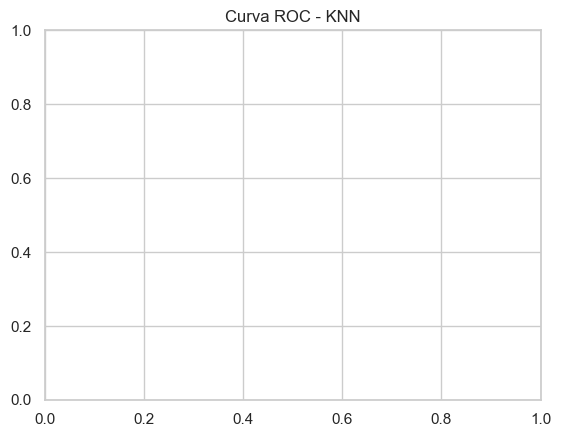

In [520]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Você pode ajustar o número de vizinhos
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

print(f'KNN - Acurácia: {accuracy_knn:.2f}, Recall: {recall_knn:.2f}, F1: {f1_knn:.2f}, ROC AUC: {roc_auc_knn:.2f}')

# Plotar curva ROC
# roc_curve(knn_model, X_test, y_test)
plt.title('Curva ROC - KNN')
plt.show()
